# Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, you will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating an article with your visualizations to be featured in the fictional "Time Magazine".

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from __future__ import division

## Step 2 Prep The Data

To look for connections between GDP and life expectancy you will need to load the datasets into DataFrames so that they can be visualized.

Load **all_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.

Hint: Use `pd.read_csv()`


In [3]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Step 3 Examine The Data

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

What six countries are represented in the data?

In [4]:
country_list = list(df['Country'].unique())
print(country_list)

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


What years are represented in the data?

In [5]:
years_list = list(df['Year'].unique())
print(years_list)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


## Step 4 Tweak The DataFrame

Look at the column names of the DataFrame `df` using `.head()`. 

In [6]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


What do you notice? The first two column names are one word each, and the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. 

**Revise The DataFrame Part A:** 

Use Pandas to change the name of the last column to `LEABY`.

Hint: Use `.rename()`. [You can read the documentation here.](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)). </font>

In [7]:
df = df.rename(index = str, columns = {"Life expectancy at birth (years)": "LEABY"})

In [8]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Run `df.head()` again to check your new column name worked.

---

## Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in `df` using `Country` on the x-axis and `GDP` on the y-axis. 
Remember to `plt.show()` your chart!

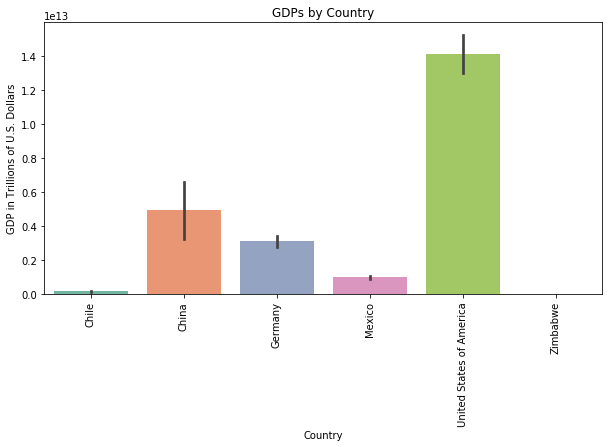

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data = df, x = 'Country', y = 'GDP', palette = "Set2")
ax.set(xlabel='Country', ylabel='GDP in Trillions of U.S. Dollars')
plt.xticks(rotation=90)
plt.title("GDPs by Country")
plt.show()

B) Create a bar chart using the data in `df` with `Country` on the x-axis and `LEABY` on the y-axis.
Remember to `plt.show()` your chart!

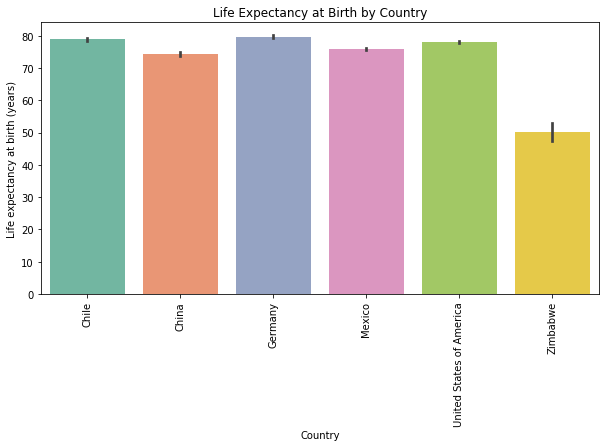

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data = df, x = 'Country', y = 'LEABY', palette = "Set2")
ax.set(xlabel='Country', ylabel='Life expectancy at birth (years)')
plt.xticks(rotation=90)
plt.title("Life Expectancy at Birth by Country")
plt.show()

What do you notice about the two bar charts? Do they look similar?

The bar charts do not look similar. The scales are different and what the two charts are measuring are different. Additionally, while there is a large variation of GDP, the Life Expectancy at Birth between countries are fairly comparable.

## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

We have added the code to instantiate a figure with the correct dimmensions to observe detail. 
1. Create an `sns.violinplot()` for the dataframe `df` and map `Country` and `LEABY` as its respective `x` and `y` axes. 
2. Be sure to show your plot

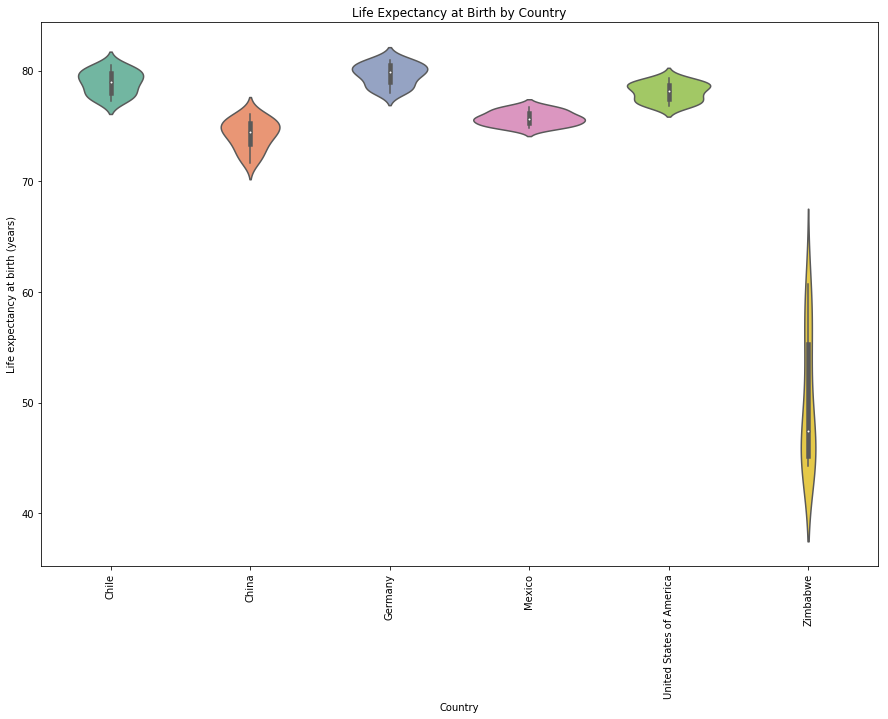

In [11]:
fig,ax = plt.subplots(figsize=(15, 10)) 
ax = sns.violinplot(data = df, x = 'Country', y = 'LEABY', palette = 'Set2')
ax.set(xlabel='Country', ylabel='Life expectancy at birth (years)')
plt.xticks(rotation=90)
plt.title("Life Expectancy at Birth by Country")
plt.show()

What do you notice about this distribution? Which country's life expactancy has changed the most?

Zimbabwe has the largest range of life expectancy. Other countries have typically a 5 year range for the life expectancy whereas Zimbabwe has a range of almost 30 years. Additionally, the life expectancy is not directly correlated with GDP as Chile has a distribution range that is close to Germany's even though the GDP of Germany is almost 4 times more.

## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, can plot the progession of GDP's over the years by country in a barplot using Seaborn.
We have set up a figure with the correct dimensions for your plot. Under that declaration:
1. Save `sns.barplot()` to a variable named `ax`
2. Chart `Country` on the x axis, and `GDP` on the `Y` axis on the barplot. Hint: `ax = sns.barplot(x="Country", y="GDP")`
3. Use the `Year` as a `hue` to differentiate the 15 years in our data. Hint: `ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)`
4. Since the names of the countries are long, let's rotate their label by 90 degrees so that they are legible. Use `plt.xticks("rotation=90")`
5. Since our GDP is in trillions of US dollars, make sure your Y label reflects that by changing it to `"GDP in Trillions of U.S. Dollars"`. Hint: `plt.ylabel("GDP in Trillions of U.S. Dollars")`
6. Be sure to show your plot.


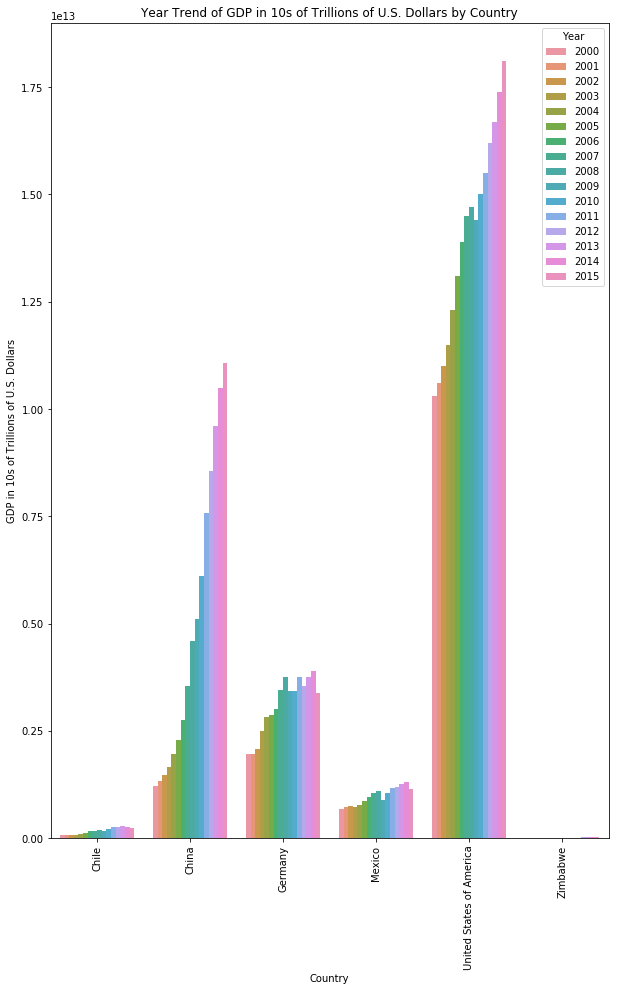

In [12]:
f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(x = "Country", y = "GDP", data = df, hue = "Year")
plt.xticks(rotation = 90)
plt.ylabel("GDP in 10s of Trillions of U.S. Dollars")
plt.title("Year Trend of GDP in 10s of Trillions of U.S. Dollars by Country")
plt.show()

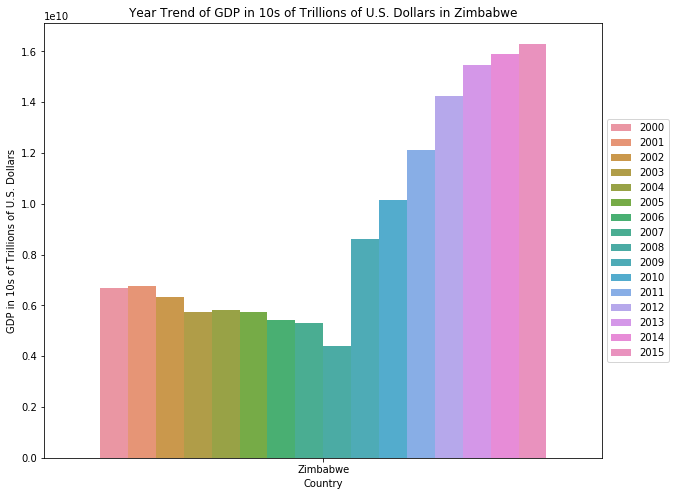

In [13]:
f, ax = plt.subplots(figsize=(10, 8)) 
ax = sns.barplot(x = "Country", y = "GDP", data = df[df['Country']=='Zimbabwe'], hue = "Year")
plt.xticks(rotation = 0)
plt.ylabel("GDP in 10s of Trillions of U.S. Dollars")
plt.title("Year Trend of GDP in 10s of Trillions of U.S. Dollars in Zimbabwe")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [14]:
#Country GDP in 2000
for country in country_list:
    df_c = df[df['Country']==country]
    df_cg = df_c.groupby(by='Year')['GDP'].mean().reset_index()
    diff_cg = df_cg.iloc[0]['GDP']
    print(country )
    print(str(diff_cg)+'\n')

Chile
77860932152.0

China
1211350000000.0

Germany
1949950000000.0

Mexico
683648000000.0

United States of America
10300000000000.0

Zimbabwe
6689957600.0



In [15]:
df_c = df
df_c['prior_year_GDP'] = 0
df_c['percent_growth'] = 0
df_c['GDP_in_2000'] = 0
df_c['percent_growth_2000s'] = 0

for i in range(0,len(df_c)):
    if df_c['Country'][i] == 'Chile':
        df_c['GDP_in_2000'][i] = 77860932152.0
    if df_c['Country'][i] == 'China':
        df_c['GDP_in_2000'][i] = 1211350000000.0
    if df_c['Country'][i] == 'Germany':
        df_c['GDP_in_2000'][i] = 1949950000000.0
    if df_c['Country'][i] == 'Mexico':
        df_c['GDP_in_2000'][i] = 683648000000.0
    if df_c['Country'][i] == 'United States of America':
        df_c['GDP_in_2000'][i] = 10300000000000.0
    if df_c['Country'][i] == 'Zimbabwe':
        df_c['GDP_in_2000'][i] = 6689957600.0


for i in range(0,len(df_c)):
    if df_c['Year'][i]==2000:
        p_gdp = 0
        df_c['percent_growth_2000s'][i] = 1       
    else:
        p_gdp = df_c['GDP'][i-1]                
    df_c['prior_year_GDP'][i] = p_gdp

df_c['percent_growth'] = df_c['GDP']/df_c['prior_year_GDP'] * 100.0
df_c['percent_growth_2000s'] = df_c['GDP']/df_c['GDP_in_2000'] * 100.0

for i in range(0,len(df_c)):
    if df_c['Year'][i]==2000:
        df_c['percent_growth'][i]=0
   

c:\users\clare\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\clare\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\clare\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\clare\appdata\local\programs\python\python35-32

In [16]:
#Test 
df_c[df_c['Country']=='China']

,Country,Year,LEABY,GDP,prior_year_GDP,percent_growth,GDP_in_2000,percent_growth_2000s
16,China,2000,71.7,1.211350e+12,0,0.000000,1211350000000,100.000000
17,China,2001,72.2,1.339400e+12,1211350000000,110.570851,1211350000000,110.570851
18,China,2002,72.7,1.470550e+12,1339400000000,109.791698,1211350000000,121.397614
19,China,2003,73.1,1.660290e+12,1470550000000,112.902655,1211350000000,137.061130
20,China,2004,73.5,1.955350e+12,1660290000000,117.771594,1211350000000,161.419078
21,China,2005,73.9,2.285970e+12,1955350000000,116.908482,1211350000000,188.712593
22,China,2006,74.2,2.752130e+12,2285970000000,120.392219,1211350000000,227.195278
23,China,2007,74.4,3.552180e+12,2752130000000,129.070211,1211350000000,293.241425
24,China,2008,74.5,4.598210e+12,3552180000000,129.447551,1211350000000,379.593842
25,China,2009,74.9,5.109950e+12,4598210000000,111.129113,1211350000000,421.839270


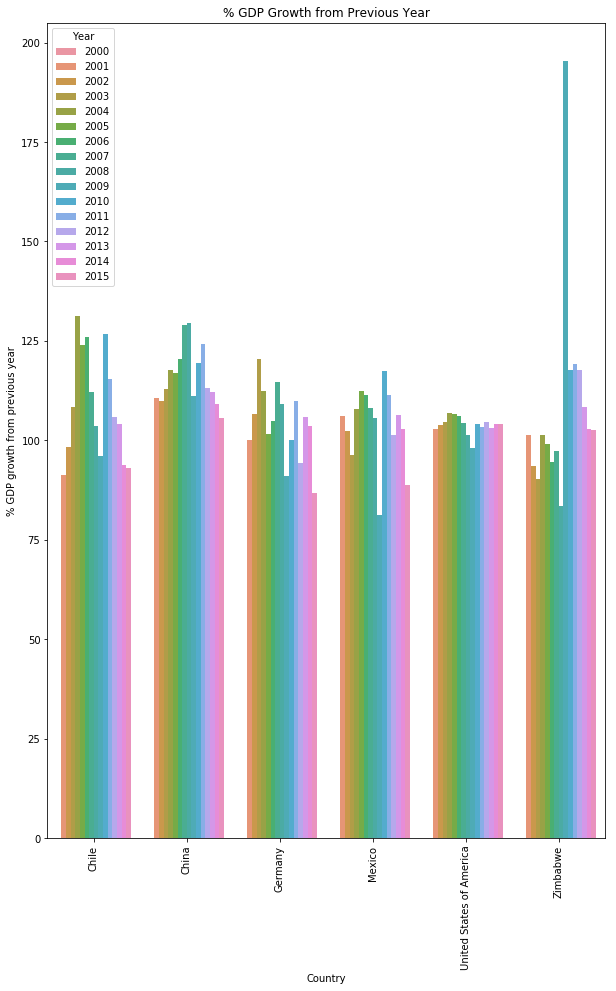

In [17]:
f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(x = "Country", y = "percent_growth", data = df_c, hue = "Year")
plt.xticks(rotation = 90)
plt.title("% GDP Growth from Previous Year")
plt.ylabel("% GDP growth from previous year")
plt.show()

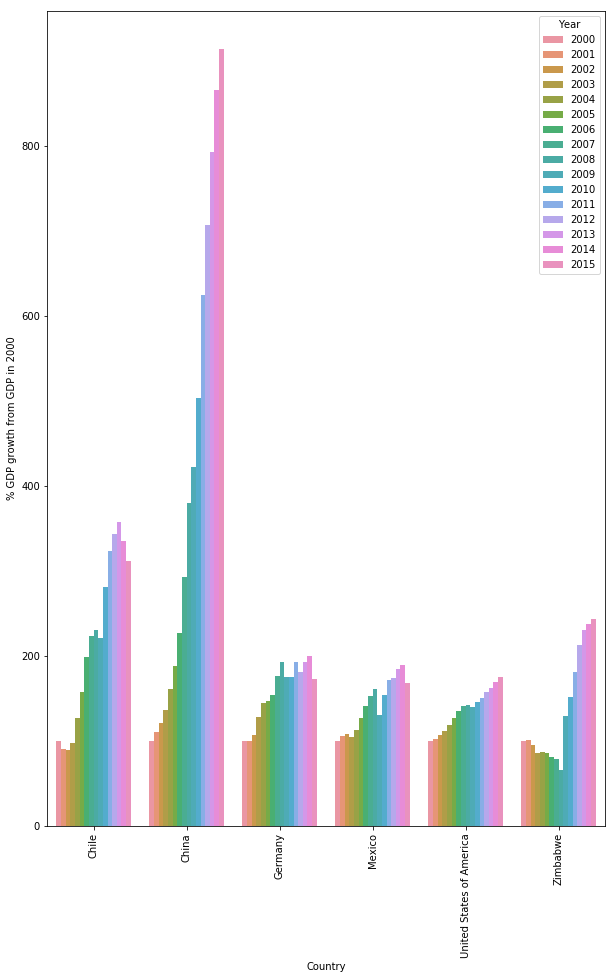

In [18]:
f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(x = "Country", y = "percent_growth_2000s", data = df_c, hue = "Year")
plt.xticks(rotation = 90)
plt.ylabel("% GDP growth from GDP in 2000")
plt.show()

What are your first impressions looking at the visualized data?

- Which countries' bars changes the most?
    - China had the largest range chronologically and in dollar amounts from 2000 to 2015 at change of ~9.9 trillion USD.
- What years are there the biggest changes in the data?
   - The years where there are the largest changes in the data occurred between 2008 and 2009 across the countries. This could be tied to the US recession driven by the sub-prime mortgage lending crisis.
   - 2010-2011 also saw a large increase in GDP for China. However, Zimbabwe had the highest % change in GDP between 2008 and 2009.
- Which country has had the least change in GDP over time? 
   - The country with the least change in GDP over time is Zimbabwe in dollar amounts.
- How do countries compare to one another?
    - The countries' GDP vary quite a bit. 
- Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy?
    - There is some correlation with lower GDP but more exploration is needed.
- Can you think of any reasons that the data looks like this for particular countries?
    - There was a drop in GDP among various countries possibly due to US recession crisis. Additionally, China has been undergoing rapid changes as it has been welcoming more foreign investments and loosening of state-run enterprises.

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

The code will essentially be the same as above! The beauty of Seaborn relies in its flexibility and extensibility. Paste the code from above in the cell bellow, and: 
1. Change your `y` value to `LEABY` in order to plot life expectancy instead of GDP. Hint: `ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df)`
2. Tweak the name of your `ylabel` to reflect this change, by making the label `"Life expectancy at birth in years"` Hint: `ax.set(ylabel="Life expectancy at birth in years")`


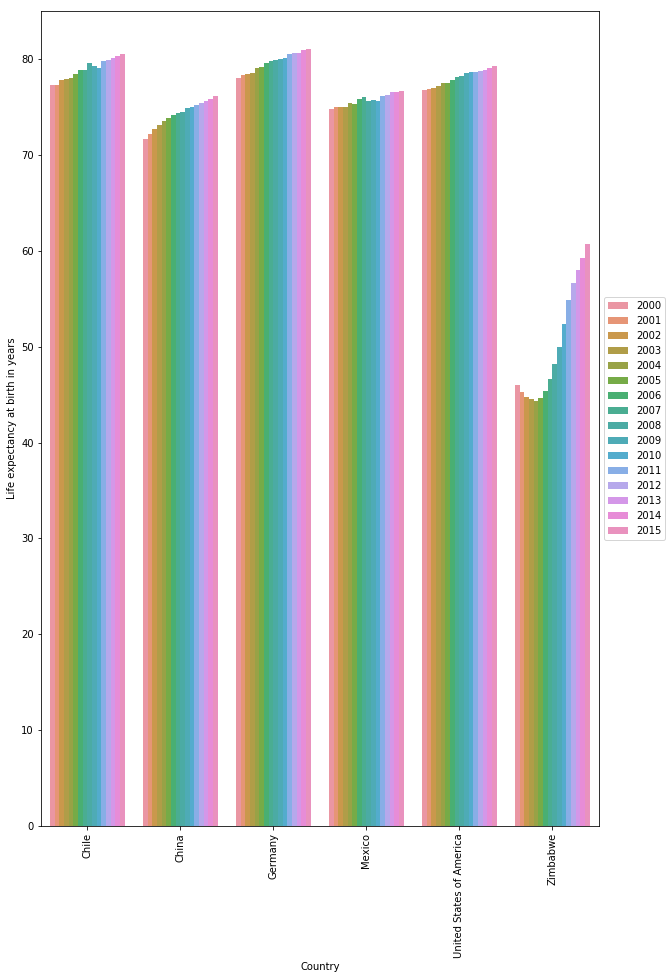

In [19]:
f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(x = "Country", y = "LEABY", data = df, hue = "Year")
plt.xticks(rotation = 90)
plt.ylabel("Life expectancy at birth in years")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

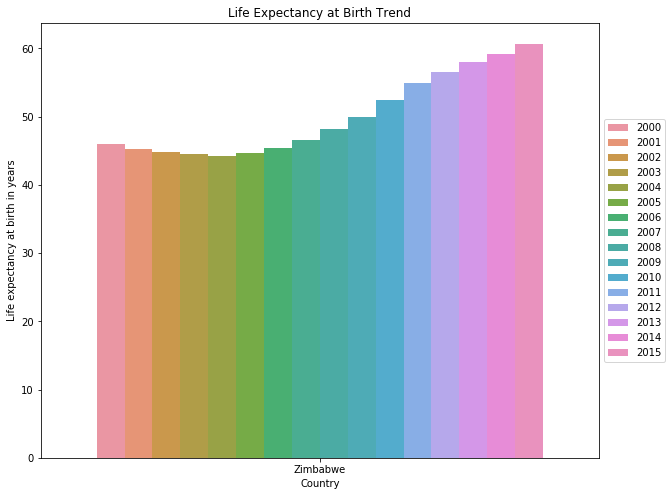

In [20]:
f, ax = plt.subplots(figsize=(10, 8)) 
ax = sns.barplot(x = "Country", y = "LEABY", data = df[df['Country']=='Zimbabwe'], hue = "Year")
plt.xticks(rotation = 0)
plt.ylabel("Life expectancy at birth in years")
plt.title('Life Expectancy at Birth Trend')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [21]:
df_z = df[df['Country']=='Zimbabwe']
df_z['LEABY_change'] = df_z['LEABY']/46 * 100.0
df_z

c:\users\clare\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Country,Year,LEABY,GDP,prior_year_GDP,percent_growth,GDP_in_2000,percent_growth_2000s,LEABY_change
80,Zimbabwe,2000,46.0,6.689958e+09,0,0.000000,6689957600,100.000000,100.000000
81,Zimbabwe,2001,45.3,6.777385e+09,6689957600,101.306841,6689957600,101.306841,98.478261
82,Zimbabwe,2002,44.8,6.342116e+09,6777384700,93.577636,6689957600,94.800547,97.391304
83,Zimbabwe,2003,44.5,5.727592e+09,6342116400,90.310418,6689957600,85.614770,96.739130
84,Zimbabwe,2004,44.3,5.805598e+09,5727591800,101.361944,6689957600,86.780795,96.304348
85,Zimbabwe,2005,44.6,5.755215e+09,5805598400,99.132162,6689957600,86.027678,96.956522
86,Zimbabwe,2006,45.4,5.443896e+09,5755215200,94.590668,6689957600,81.374155,98.695652
87,Zimbabwe,2007,46.6,5.291950e+09,5443896500,97.208867,6689957600,79.102894,101.304348
88,Zimbabwe,2008,48.2,4.415703e+09,5291950100,83.441883,6689957600,66.004944,104.782609
89,Zimbabwe,2009,50.0,8.621574e+09,4415702800,195.248050,6689957600,128.873367,108.695652


Note: You've mapped two bar plots showcasing a variable over time by country, however, bar charts are not traditionally used for this purpose. In fact, a great way to visualize a variable over time is by using a line plot. While the bar charts tell us some information, the data would be better illustrated on a line plot.  We will complete this in steps 9 and 10, for now let's switch gears and create another type of chart.

## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function)[https://seaborn.pydata.org/generated/seaborn.FacetGrid.html] called `FacetGrid`. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!
    
Since this may be the first time you've learned about FacetGrid, we have prepped a fill in the blank code snippet below. 
Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up for every Year in the data
3. We want the data points to be differentiated (hue) by Country.
4. We want to use a Matplotlib scatter plot to visualize the different graphs


Be sure to show your plot!


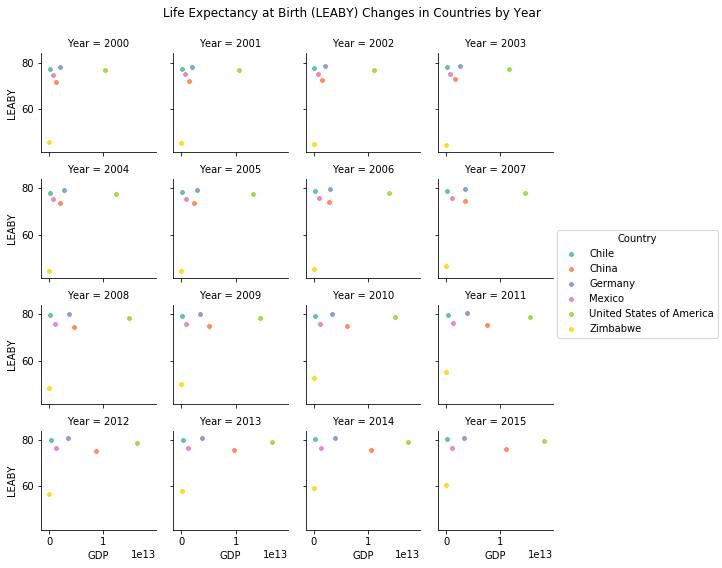

In [22]:
# WORDBANK:
# "Year"
# "Country" 
# "GDP" 
# "LEABY" 
# plt.scatter


# Uncomment the code below and fill in the blanks
g = sns.FacetGrid(df, col='Year', hue='Country', col_wrap=4, size=2, palette = 'Set2')
g = (g.map(plt.scatter,'GDP', 'LEABY', edgecolor="w").add_legend())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Life Expectancy at Birth (LEABY) Changes in Countries by Year')
plt.show()

+ Which country moves the most along the X axis over the years?
    - China moved the most along the x axis over the years
+ Which country moves the most along the Y axis over the years?
    - Zimbabwe moved the most along Y axis over the years
+ Is this surprising?
    - No, this follows what we had previously seen
+ Do you think these scatter plots are easy to read? Maybe there's a way to plot that! 
    - No, this is not a very easy to read graph. It's hard to trace any correlation or trend. It would be better to look at grouping by countries.

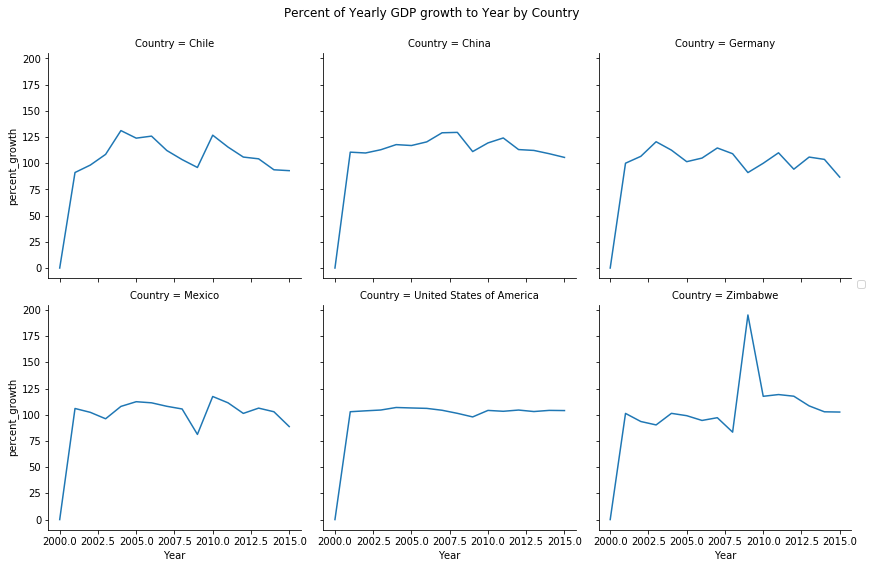

In [23]:
# Uncomment the code below and fill in the blanks
g2 = sns.FacetGrid(df_c, col="Country", col_wrap=3, size=4)
g2 = (g2.map(plt.plot, "Year", "percent_growth").add_legend())
plt.subplots_adjust(top=0.9)
g2.fig.suptitle('Percent of Yearly GDP growth to Year by Country')
plt.show()

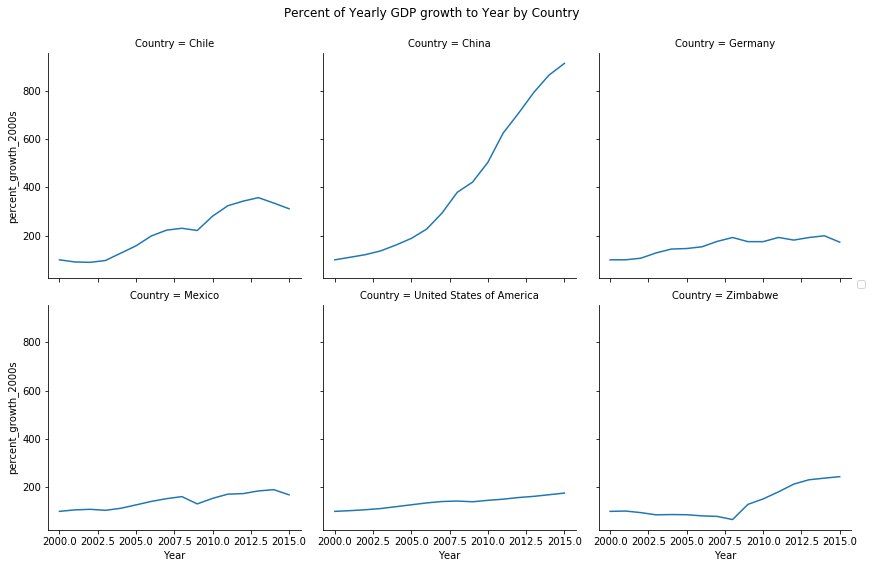

In [24]:
# Uncomment the code below and fill in the blanks
g2 = sns.FacetGrid(df_c, col="Country", col_wrap=3, size=4)
g2 = (g2.map(plt.plot, "Year", "percent_growth_2000s").add_legend())
plt.subplots_adjust(top=0.9)
g2.fig.suptitle('Percent of Yearly GDP growth to Year by Country')
plt.show()

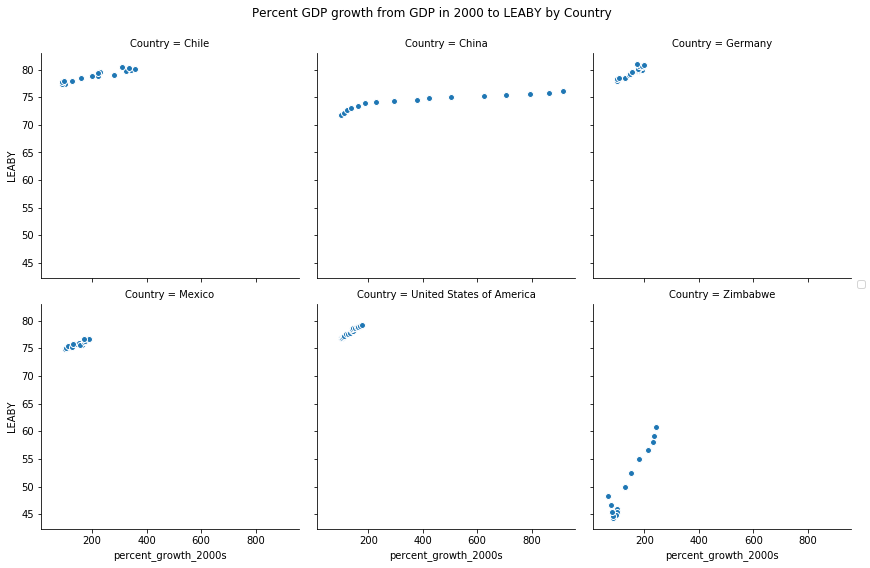

In [25]:
# Let's see if there's any correlation on GDP growth from 2000 to LEABY
g2 = sns.FacetGrid(df_c, col="Country", col_wrap=3, size=4)
g2 = (g2.map(plt.scatter,'percent_growth_2000s', 'LEABY', edgecolor="w").add_legend())
plt.subplots_adjust(top=0.9)
g2.fig.suptitle('Percent GDP growth from GDP in 2000 to LEABY by Country')
plt.show()

## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country. 

FacetGrid also allows you to do that! Instead of passing in `plt.scatter` as your Matplotlib function, you would have to pass in `plt.plot` to see a line graph. A few other things have to change as well. So we have created a different codesnippets with fill in the blanks.  that makes use of a line chart, and we will make two seperate FacetGrids for both GDP and Life Expectancy separately.

Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up by Country
3. We want to use a Matplotlib line plot to visualize the different graphs


Be sure to show your plot!



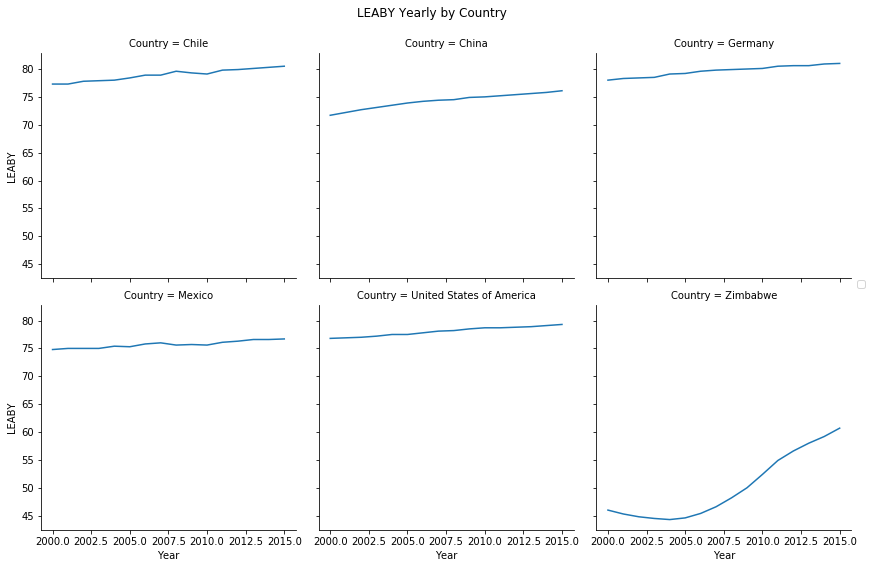

In [26]:
# WORDBANK:
# plt.plot
# "LEABY"
# "Year"
# "Country"


# Uncomment the code below and fill in the blanks
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, size=4)
g3 = (g3.map(plt.plot, "Year", "LEABY").add_legend())
plt.subplots_adjust(top=0.9)
g3.fig.suptitle('LEABY Yearly by Country')
plt.show()

What are your first impressions looking at the visualized data?

- Which countries' line changes the most?
    - Zimbabwe
- What years are there the biggest changes in the data?
    - Between 2007 to 2010
- Which country has had the least change in life expectancy over time?
    - Mexico
- Can you think of any reasons that the data looks like this for particular countries?
    - Zimbabwe had been battling the HIV/AIDs epidemic since the late 90s and only recently had seen improvements. Additionally, there were severe food shortages in the early 2000s due to hyperinflation. Mexico's life expectancy probably stayed fairly constant as it was already quite high.

## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

Once you complete and successfully run the code above, copy and paste it into the cell below. Change the variable for the X axis. Change the color on your own! Be sure to show your plot.


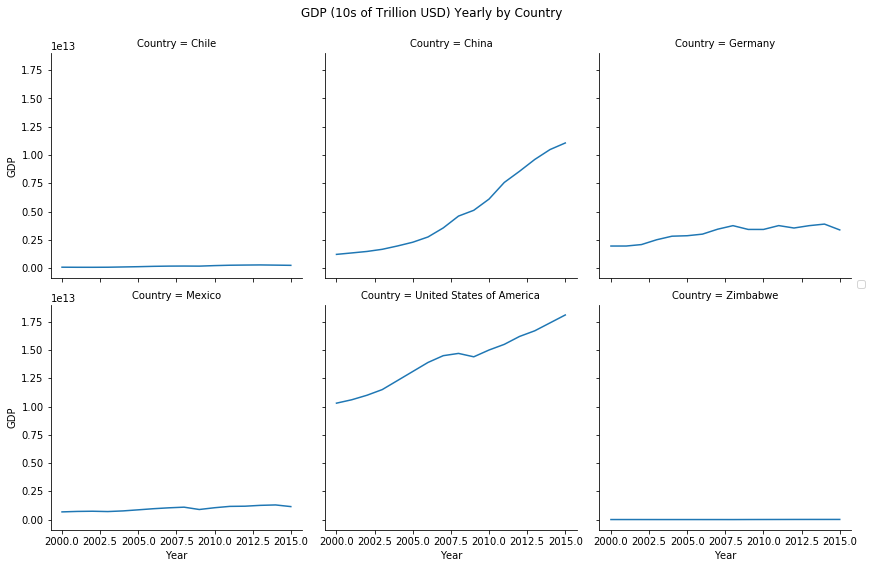

In [27]:
g4 = sns.FacetGrid(df, col="Country", col_wrap=3, size=4)
g4 = (g4.map(plt.plot, "Year", "GDP").add_legend())
plt.subplots_adjust(top=0.9)
g4.fig.suptitle('GDP (10s of Trillion USD) Yearly by Country')
plt.show()

Which countries have the highest and lowest GDP?
- Highest: USA
- Lowest: Zimbabwe

Which countries have the highest and lowest life expectancy?
- Highest: Germany
- Lowest: Zimbabwe

## Step 11 Researching Data Context 

Based on the visualization, choose one part the data to research a little further so you can add some real world context to the visualization. You can choose anything you like, or use the example question below.

What happened in China between in the past 10 years that increased the GDP so drastically?

What happened in Zimbabwe to increase life expectancy?
- From: https://www.ft.com/content/38c2ad3e-0874-11e6-b6d3-746f8e9cdd33
	> The HIV/Aids epidemic was a major killer then, and efforts to prevent infection and prolong the lives of those infected have played a part in the subsequent rebound in longevity since 2000.

- From [Wikipedia](https://en.wikipedia.org/wiki/Economy_of_Zimbabwe): 
    > The economy of Zimbabwe shrunk significantly after 2000, resulting in a desperate situation for the country – widespread poverty and a 95% unemployment rate. Zimbabwe's participation from 1998 to 2002 in the war in the Democratic Republic of the Congo set the stage for this deterioration by draining the country of hundreds of millions of dollars. Hyperinflation in Zimbabwe was a major problem from about 2003 to April 2009, when the country suspended its own currency. Zimbabwe faced 231 million percent peak hyperinflation in 2008. A combination of the abandonment of the Zimbabwe dollar and a government of national unity in 2009 resulted in a period of positive economic growth for the first time in a decade.
    - 95% unemployment and widespread poverty could have reduced life expectancy due to food shortages
- From [New York Times](https://www.nytimes.com/2002/08/07/opinion/zimbabwe-s-man-made-famine.html) - In 2002, 6 million Zimbabweans may face starvation and 25% of the population had HIV/AIDs.
- From [Wikipedia](https://en.wikipedia.org/wiki/2008_Zimbabwean_cholera_outbreak):
> The 2008 Zimbabwean cholera outbreak was an epidemic of cholera affecting much of Zimbabwe from August 2008 until June 2009. The outbreak began in Chitungwiza in Mashonaland East Province in August 2008, then spread throughout the country so that by December 2008, cases were being reported in all 10 provinces. In December 2008, The Zimbabwean government declared the outbreak a national emergency and requested international aid. The outbreak peaked in January 2009 with 8,500 cases reported per week. In July 2009, after no cases had been reported for several weeks, the Zimbabwe Ministry of Health and Child Welfare declared the outbreak over. In total, 98,596 cases of cholera and 4,369 deaths were reported, making this the largest outbreak of cholera ever recorded in Zimbabwe. The large scale and severity of the outbreak has been attributed to poor sanitation, limited access to healthcare, and insufficient healthcare infrastructure throughout Zimbabwe.



## Step 12 Create Blog Post

Use the content you have created in this Jupyter notebook to create a blog post reflecting on this data.
Include the following visuals in your blogpost:

1. The violin plot of the life expectancy distribution by country
2. The facet grid of scatter graphs mapping GDP as a function Life Expectancy by country
3. The facet grid of line graphs mapping GDP by country
4. The facet grid of line graphs mapping Life Expectancy by country


We encourage you to spend some time customizing the color and style of your plots! Remember to use `plt.savefig("filename.png")` to save your figures as a `.png` file.

When authoring your blog post, here are a few guiding questions to guide your research and writing:
+ How do you think the histories and the cultural values of each country relate to its GDP and life expectancy?
+ What would have helped make the project data more reliable? What were the limitations of the dataset?
+ Which graphs better illustrate different relationships??